## Importing Libraries

In [1]:
# importing the basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Importing the dataset
df = pd.read_csv("E:\dataset_folder\iris_flower.csv") 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

In [3]:
# describing the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# checking the datatypes of the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Label encoding for the target feature of the dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [6]:
x = df[['sepal_length','sepal_width','petal_width','petal_width']]
y = df['species']

# Splitting dataset 

In [7]:
# splitting the datset into the train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
# importing the model for the accuracy 

from sklearn.linear_model import LinearRegression

In [9]:
# fitting the model on the Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
# predicting on the test dataset
y_pred = lr.predict(x_test)

In [11]:
# importing library for the measuring of errors in the datset
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
r2_score(y_test,y_pred)

0.9476371968089161

In [12]:
import sklearn.metrics as metrics

print("mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))
print("mean squared errors:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared erros:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.14567151276215787
mean squared errors: 0.03687878867405284
root mean squared erros: 0.19203850831032


C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


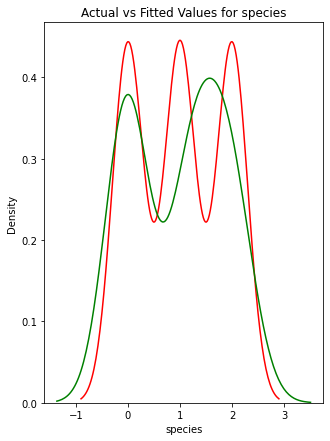

In [13]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="g", label="Predicted Values" , ax=ax)
plt.title('Actual vs Fitted Values for species')
plt.show()
plt.close()